In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
import os
from PIL import Image,ImageOps 

In [2]:
#Loading the model architecture
class LogisticRegressionClassifier(nn.Module):
    def __init__(self,input_size=28*28,num_classes=10):
        super(LogisticRegressionClassifier,self).__init__()
        self.linear=nn.Linear(input_size,num_classes)
    def forward(self,x):
        x=x.view(-1,28*28) 
        return self.linear(x)

In [3]:
#Instantiating the model
model=LogisticRegressionClassifier()
#Loading the model
model.load_state_dict(torch.load("Logistic_Regression_Classifier.pth")) 
model.eval()

LogisticRegressionClassifier(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

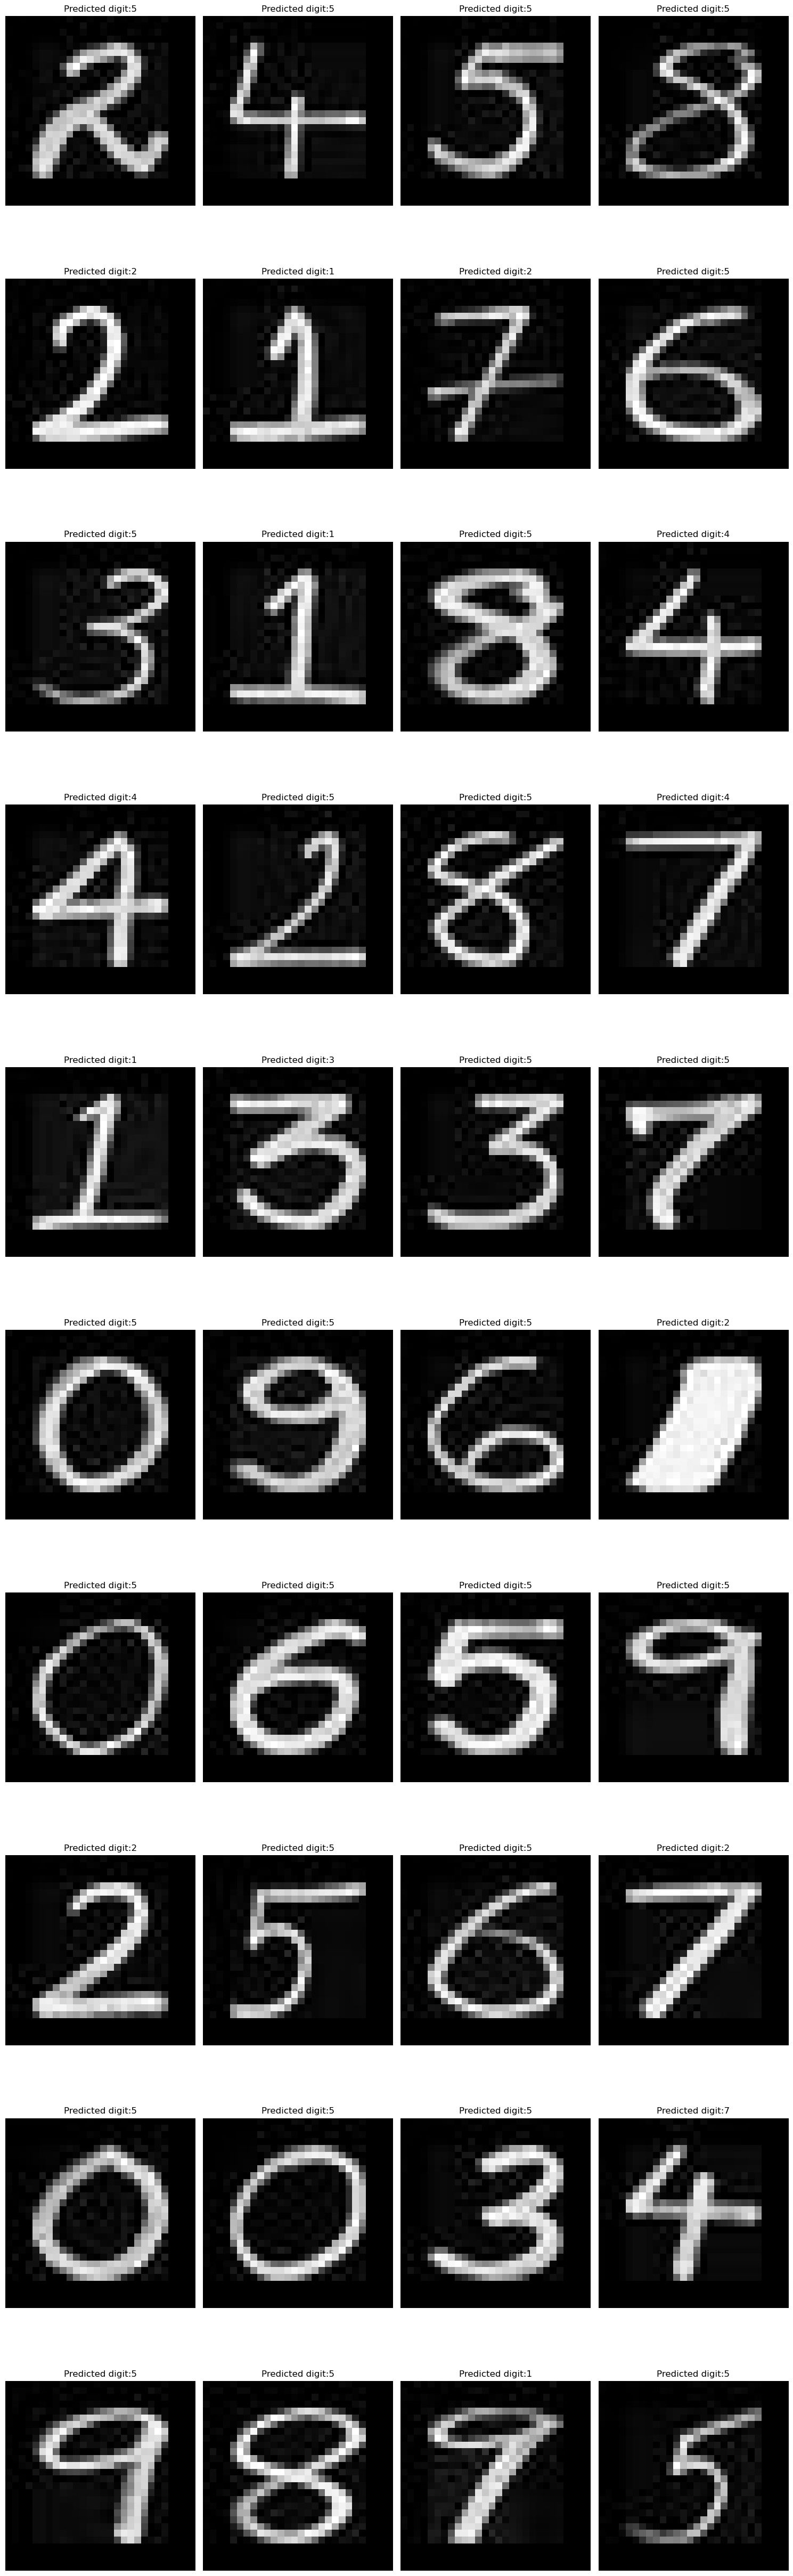

In [4]:
#Loading the folder 
input_folder="Test_Images_1"
transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
predictions=[]
#Looping through each file in the folder
for filename in os.listdir(input_folder):
    #Checking if the file is a jpeg image
    if filename.lower().endswith(".jpeg"):
        path=os.path.join(input_folder,filename)
        image=Image.open(path)
        input_tensor=transform(image).unsqueeze(0)
        with torch.no_grad():
            #Forward pass
            output=model(input_tensor)
            predicted_index=torch.argmax(output).item()
        #Storing the image and the predicted label
        predictions.append((image,predicted_index))      
images=len(predictions)
rows=(images+2)//4  
plt.figure(figsize=(15,5*rows))
for i,(image,predicted_index) in enumerate(predictions):
    #Displaying the image 
    plt.subplot(rows,4,i+1)
    plt.imshow(image,cmap="gray")
    plt.title(f"Predicted digit:{predicted_index}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [5]:
#Labels of the test images
labels=[2,4,5,8,2,1,7,6,3,1,8,4,4,2,8,7,1,3,3,7,0,9,6,1,0,6,5,9,2,5,6,7,0,0,3,4,9,8,9,5]
correct=0
for (_,predicted_label),true_label in zip(predictions,labels):
    if predicted_label==true_label:
        correct+=1
test_accuracy=(100*(correct/len(labels)))
#Displaying the testing accuracy
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 30.00%


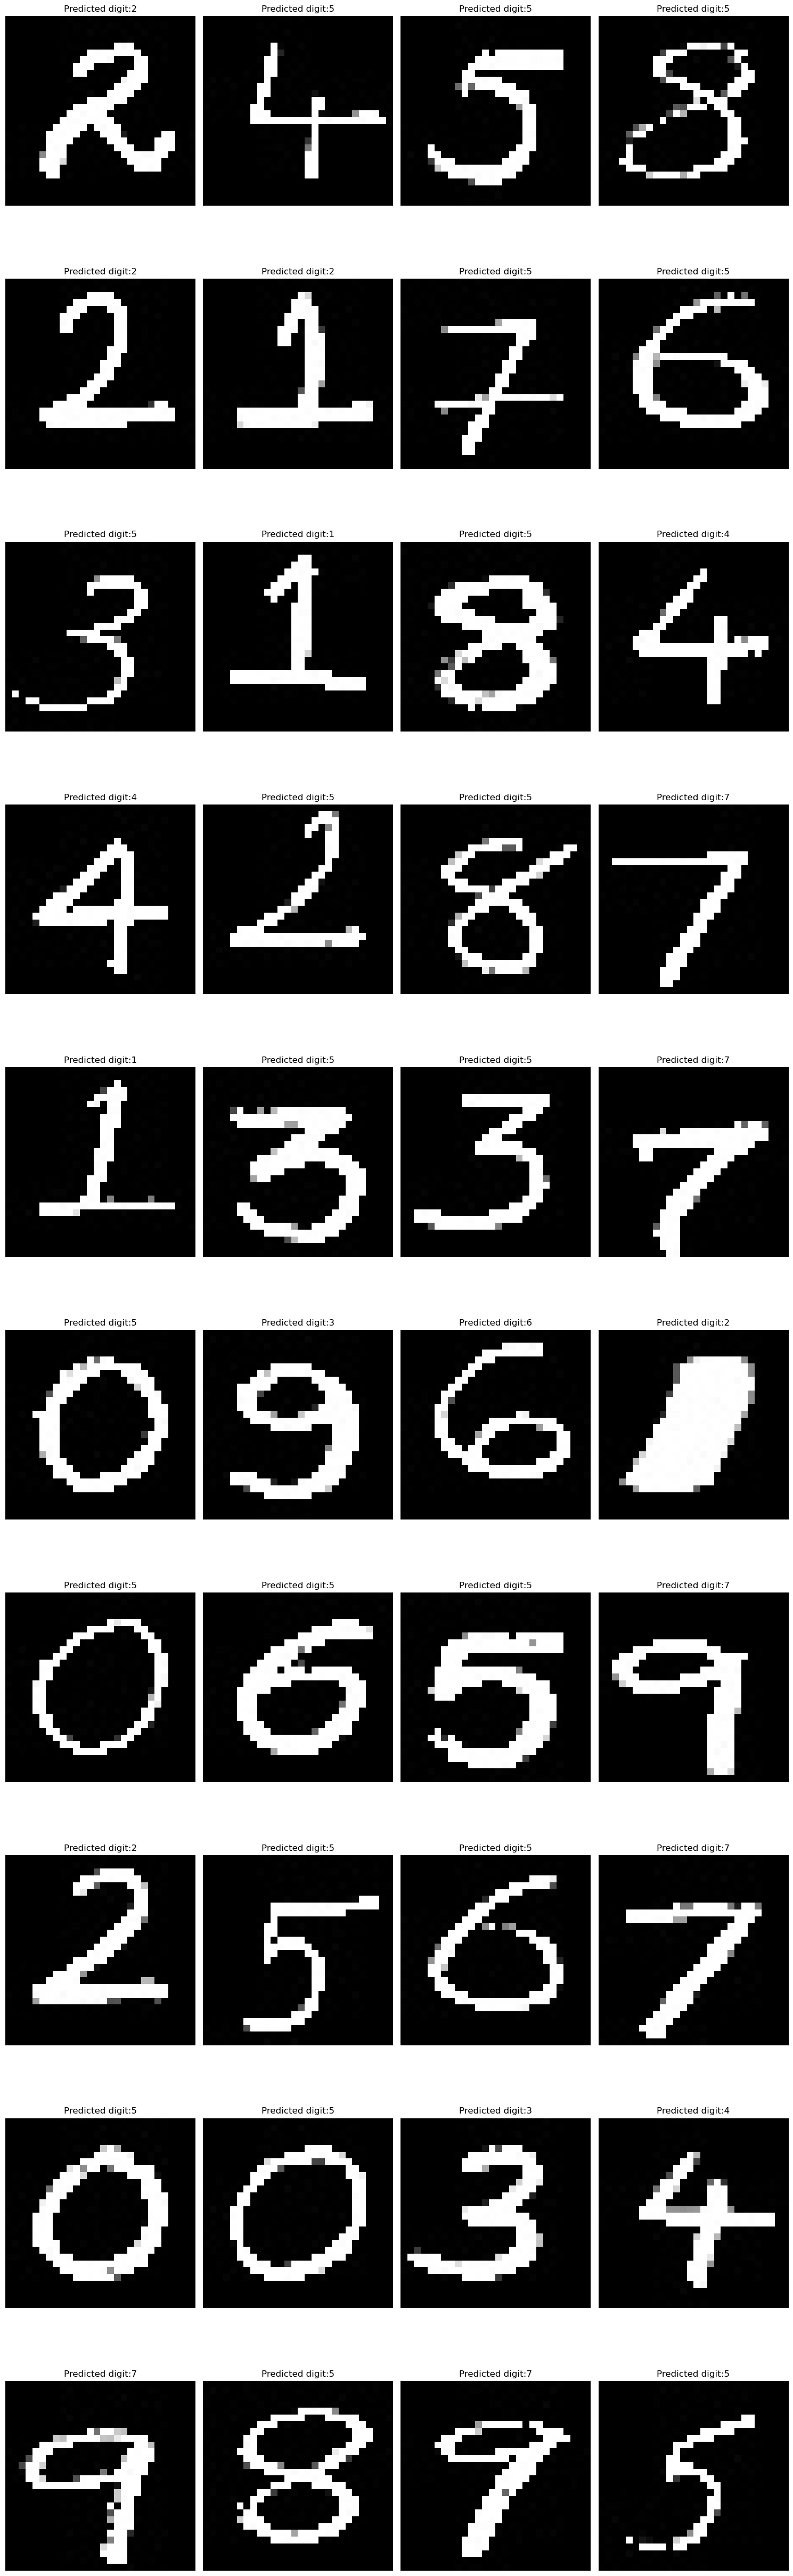

In [6]:
#Loading the folder 
input_folder="Test_Images_2"
transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
predictions=[]
#Looping through each file in the folder
for filename in os.listdir(input_folder):
    #Checking if the file is a jpeg image
    if filename.lower().endswith(".jpeg"):
        path=os.path.join(input_folder,filename)
        image=Image.open(path)
        input_tensor=transform(image).unsqueeze(0)
        with torch.no_grad():
            #Forward pass
            output=model(input_tensor)
            predicted_index=torch.argmax(output).item()
        #Storing the image and the predicted label
        predictions.append((image,predicted_index))      
images=len(predictions)
rows=(images+2)//4  
plt.figure(figsize=(15,5*rows))
for i,(image,predicted_index) in enumerate(predictions):
    #Displaying the image 
    plt.subplot(rows,4,i+1)
    plt.imshow(image,cmap="gray")
    plt.title(f"Predicted digit:{predicted_index}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [7]:
#Labels of the test images
labels=[2,4,5,8,2,1,7,6,3,1,8,4,4,2,8,7,1,3,3,7,0,9,6,1,0,6,5,9,2,5,6,7,0,0,3,4,9,8,9,5]
correct=0
for (_,predicted_label),true_label in zip(predictions,labels):
    if predicted_label==true_label:
        correct+=1
test_accuracy=(100*(correct/len(labels)))
#Displaying the testing accuracy
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 42.50%
